# Data Collection, Data Visualization, Data Exploration and Data Processing

## Data Collection

In [80]:
# Import required modules
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
# Import data from google drive
df_players = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/IE_7275/Project/CS:GO/players.csv")
df_economy = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/IE_7275/Project/CS:GO/economy.csv")
df_picks = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/IE_7275/Project/CS:GO/picks.csv")
df_results = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/IE_7275/Project/CS:GO/results.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Since economy.csv and results.csv has simlilar size of data, we could merge them together and generate a new data frame. Players.csv is more independent, and it describes for each match, every individual player's status, we could use it seprately. For picks.csv, since it missed 3/4 of the match record, we could use it seprately as well.

In [82]:
# Merge economy.csv and results.csv together to generate new data frame
df = pd.merge(df_economy, df_results, 
              how = 'inner', 
              on = ['match_id','date', 'event_id','team_1','team_2','_map'])
df
# n = 0
# for i in range (0,len(df.axes[1])):
#   print(str(n) + ' '+ str(df.iloc[:,i].dtypes))
#   n+=1
# # df.iloc[:,10].dtypes

,date,match_id,event_id,team_1,team_2,best_of,_map,t1_start,t2_start,1_t1,...,starting_ct,ct_1,t_2,t_1,ct_2,rank_1,rank_2,map_wins_1,map_wins_2,match_winner
0,2020-03-01,2339402,4901,G2,Natus Vincere,5,Nuke,t,ct,4350.0,...,2,3,2,1,14,8,6,0,3,2
1,2020-03-01,2339402,4901,G2,Natus Vincere,5,Dust2,ct,t,3900.0,...,1,7,8,6,8,8,6,0,3,2
2,2020-03-01,2339402,4901,G2,Natus Vincere,5,Mirage,t,ct,4150.0,...,2,1,2,1,14,8,6,0,3,2
3,2020-02-29,2339401,4901,Natus Vincere,Astralis,3,Dust2,t,ct,4150.0,...,2,2,4,14,1,6,1,2,0,1
4,2020-02-29,2339401,4901,Natus Vincere,Astralis,3,Nuke,ct,t,4200.0,...,1,13,2,3,3,6,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31705,2017-04-04,2309263,2683,FaZe,HellRaisers,1,Cache,t,ct,4250.0,...,2,4,7,6,9,4,15,10,16,2
31706,2017-04-04,2309262,2683,Astralis,CLG,1,Train,t,ct,4250.0,...,2,10,2,6,9,1,24,16,11,1
31707,2017-04-04,2309261,2683,SK,TYLOO,1,Mirage,ct,t,4350.0,...,1,7,8,9,4,3,33,16,12,1
31708,2017-04-04,2309260,2683,Virtus.pro,MVP Project,1,Mirage,t,ct,4150.0,...,2,5,0,11,4,2,98,16,4,1


## Data Cleaning and Column Reducing
Since we would like to analyse the overall economy and result, we could reduce columns of new data frame

In [83]:
# Check colums names
n = 0
for col in df:
  print(str(n)+' '+(col))
  n += 1

0 date
1 match_id
2 event_id
3 team_1
4 team_2
5 best_of
6 _map
7 t1_start
8 t2_start
9 1_t1
10 2_t1
11 3_t1
12 4_t1
13 5_t1
14 6_t1
15 7_t1
16 8_t1
17 9_t1
18 10_t1
19 11_t1
20 12_t1
21 13_t1
22 14_t1
23 15_t1
24 16_t1
25 17_t1
26 18_t1
27 19_t1
28 20_t1
29 21_t1
30 22_t1
31 23_t1
32 24_t1
33 25_t1
34 26_t1
35 27_t1
36 28_t1
37 29_t1
38 30_t1
39 1_t2
40 2_t2
41 3_t2
42 4_t2
43 5_t2
44 6_t2
45 7_t2
46 8_t2
47 9_t2
48 10_t2
49 11_t2
50 12_t2
51 13_t2
52 14_t2
53 15_t2
54 16_t2
55 17_t2
56 18_t2
57 19_t2
58 20_t2
59 21_t2
60 22_t2
61 23_t2
62 24_t2
63 25_t2
64 26_t2
65 27_t2
66 28_t2
67 29_t2
68 30_t2
69 1_winner
70 2_winner
71 3_winner
72 4_winner
73 5_winner
74 6_winner
75 7_winner
76 8_winner
77 9_winner
78 10_winner
79 11_winner
80 12_winner
81 13_winner
82 14_winner
83 15_winner
84 16_winner
85 17_winner
86 18_winner
87 19_winner
88 20_winner
89 21_winner
90 22_winner
91 23_winner
92 24_winner
93 25_winner
94 26_winner
95 27_winner
96 28_winner
97 29_winner
98 30_winner
99 result_1


In [84]:
# Create total economy columns team_1_eco and team_2_eco
df['team_1_eco'] = df.iloc[:,9:39].sum(axis=1)
df['team_2_eco'] = df.iloc[:,39:69].sum(axis=1)
# drop colums that we would not use
df.drop(df.iloc[:,9:99], axis = 1, inplace = True)
df_temp = df
df_temp

,date,match_id,event_id,team_1,team_2,best_of,_map,t1_start,t2_start,result_1,...,t_2,t_1,ct_2,rank_1,rank_2,map_wins_1,map_wins_2,match_winner,team_1_eco,team_2_eco
0,2020-03-01,2339402,4901,G2,Natus Vincere,5,Nuke,t,ct,4,...,2,1,14,8,6,0,3,2,344850.0,479750.0
1,2020-03-01,2339402,4901,G2,Natus Vincere,5,Dust2,ct,t,13,...,8,6,8,8,6,0,3,2,604150.0,578200.0
2,2020-03-01,2339402,4901,G2,Natus Vincere,5,Mirage,t,ct,2,...,2,1,14,8,6,0,3,2,280700.0,461650.0
3,2020-02-29,2339401,4901,Natus Vincere,Astralis,3,Dust2,t,ct,16,...,4,14,1,6,1,2,0,1,437550.0,376300.0
4,2020-02-29,2339401,4901,Natus Vincere,Astralis,3,Nuke,ct,t,16,...,2,3,3,6,1,2,0,1,502050.0,370550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31705,2017-04-04,2309263,2683,FaZe,HellRaisers,1,Cache,t,ct,10,...,7,6,9,4,15,10,16,2,511550.0,519450.0
31706,2017-04-04,2309262,2683,Astralis,CLG,1,Train,t,ct,16,...,2,6,9,1,24,16,11,1,633700.0,524650.0
31707,2017-04-04,2309261,2683,SK,TYLOO,1,Mirage,ct,t,16,...,8,9,4,3,33,16,12,1,569150.0,513800.0
31708,2017-04-04,2309260,2683,Virtus.pro,MVP Project,1,Mirage,t,ct,16,...,0,11,4,2,98,16,4,1,425500.0,310700.0


In [85]:
# df.to_csv('eco_result.csv') 

In [86]:
# calculate win rate
df_temp['win_rate_1'] = (df_temp['result_1']/(df_temp['result_1']+df_temp['result_2'])).round(2)
df_temp['win_rate_2'] = (df_temp['result_2']/(df_temp['result_1']+df_temp['result_2'])).round(2)
df_temp['best_of']= df_temp['best_of'].replace("o", 0)
df_temp['best_of'] = pd.to_numeric(df_temp['best_of'], downcast='integer')
# seprate team 1 valeus and team 2 values
df_1 = df_temp[['date','match_id','event_id','team_1','_map','t1_start','result_1','ct_1','t_1','rank_1','team_1_eco','win_rate_1']]
df_2 = df_temp[['date','match_id','event_id','team_2','_map','t2_start','result_2','ct_2','t_2','rank_2','team_2_eco','win_rate_2']]
df_1['won/lost'] = [1 if x == 1 else 0 for x in df['match_winner']]
df_2['won/lost'] = [1 if x == 2 else 0 for x in df['match_winner']]

<ipython-input-86-1d6c5ed72609>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['won/lost'] = [1 if x == 1 else 0 for x in df['match_winner']]
<ipython-input-86-1d6c5ed72609>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['won/lost'] = [1 if x == 2 else 0 for x in df['match_winner']]


In [87]:
df_1 = df_1.rename(columns={"team_1": "team", "t1_start": "start_as","result_1":"result","ct_1":"ct_win","t_1":"t_win","rank_1":"rank","team_1_eco":"team_eco","win_rate_1":"win_rate"})
df_2 = df_2.rename(columns={"team_2": "team", "t2_start": "start_as","result_2":"result","ct_2":"ct_win","t_2":"t_win","rank_2":"rank","team_2_eco":"team_eco","win_rate_2":"win_rate"})
print(df_1.head())
print(df_2.head())
df = pd.concat([df_1, df_2])

         date  match_id  event_id           team    _map start_as  result  \
0  2020-03-01   2339402      4901             G2    Nuke        t       4   
1  2020-03-01   2339402      4901             G2   Dust2       ct      13   
2  2020-03-01   2339402      4901             G2  Mirage        t       2   
3  2020-02-29   2339401      4901  Natus Vincere   Dust2        t      16   
4  2020-02-29   2339401      4901  Natus Vincere    Nuke       ct      16   

   ct_win  t_win  rank  team_eco  win_rate  won/lost  
0       3      1     8  344850.0      0.20         0  
1       7      6     8  604150.0      0.45         0  
2       1      1     8  280700.0      0.11         0  
3       2     14     6  437550.0      0.76         1  
4      13      3     6  502050.0      0.76         1  
         date  match_id  event_id           team    _map start_as  result  \
0  2020-03-01   2339402      4901  Natus Vincere    Nuke       ct      16   
1  2020-03-01   2339402      4901  Natus Vincere   Du

In [88]:
df = df[df.index.duplicated()]
df

,date,match_id,event_id,team,_map,start_as,result,ct_win,t_win,rank,team_eco,win_rate,won/lost
0,2020-03-01,2339402,4901,Natus Vincere,Nuke,ct,16,14,2,6,479750.0,0.80,1
1,2020-03-01,2339402,4901,Natus Vincere,Dust2,t,16,8,8,6,578200.0,0.55,1
2,2020-03-01,2339402,4901,Natus Vincere,Mirage,ct,16,14,2,6,461650.0,0.89,1
3,2020-02-29,2339401,4901,Astralis,Dust2,ct,5,1,4,1,376300.0,0.24,0
4,2020-02-29,2339401,4901,Astralis,Nuke,t,5,3,2,1,370550.0,0.24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31705,2017-04-04,2309263,2683,HellRaisers,Cache,ct,16,9,7,15,519450.0,0.62,1
31706,2017-04-04,2309262,2683,CLG,Train,ct,11,9,2,24,524650.0,0.41,0
31707,2017-04-04,2309261,2683,TYLOO,Mirage,t,12,4,8,33,513800.0,0.43,0
31708,2017-04-04,2309260,2683,MVP Project,Mirage,ct,4,4,0,98,310700.0,0.20,0


In [89]:
# check how many matches, events, teams, maps in this data
print(str(df['match_id'].nunique())+" matches in this dataset")
print(str(df['event_id'].nunique())+" events in this dataset")
print(str(df['team'].nunique())+" teams in this dataset")
print(str(df['_map'].nunique())+" maps in this dataset")

19061 matches in this dataset
1750 events in this dataset
1047 teams in this dataset
10 maps in this dataset


## Data Analysis and Plot

Text(0, 0.5, 'Won Matches Count')

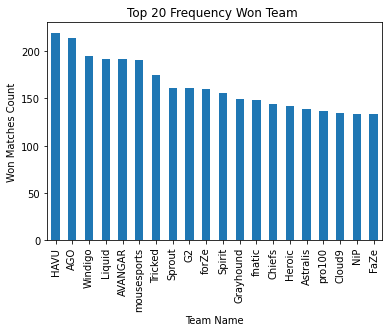

In [90]:
# check top 10 teams with highest match win time
top_team_win_match = pd.DataFrame(df.groupby('team')['won/lost'].sum())
top_team_win_match = top_team_win_match.sort_values(by='won/lost', ascending=False).head(20)
top_team_win_match.plot(kind="bar",legend = False)
plt.title("Top 20 Frequency Won Team ")
plt.xlabel("Team Name")
plt.ylabel("Won Matches Count")

Text(0, 0.5, 'Won Matches Count')

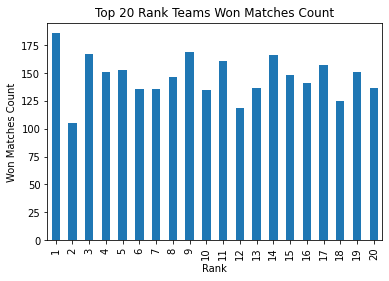

In [91]:
# check top 20 rank team win matches count
df_rank = df.loc[(df['rank']<=20)]
top_rank_team = pd.DataFrame(df_rank.groupby('rank')['won/lost'].sum())
# top_rank_team = top_rank_team.sort_values(by='won/lost', ascending=False)
top_rank_team.plot(kind="bar",legend = False)
plt.title("Top 20 Rank Teams Won Matches Count")
plt.xlabel("Rank")
plt.ylabel("Won Matches Count")

In [92]:
#top 20 rank team, T win or CT win number
winct = df_rank['ct_win'].sum()
winct
wint = df_rank['ct_win'].sum()

Text(0, 0.5, 'Won Matches Count')

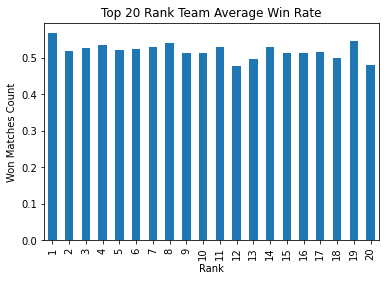

In [93]:
# check top 20 rank team average win rate
top_rank_team_wr = pd.DataFrame(df_rank.groupby('rank')['win_rate'].mean())
# top_rank_team = top_rank_team.sort_values(by='won/lost', ascending=False)
top_rank_team_wr.plot(kind="bar",legend = False)
plt.title("Top 20 Rank Team Average Win Rate")
plt.xlabel("Rank")
plt.ylabel("Won Matches Count")

Text(0, 0.5, 'Matches Count')

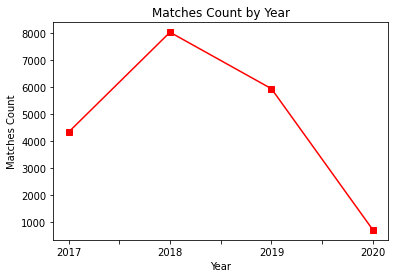

In [94]:
# check numbers of matches between 2017 - 2020
df['date'] = pd.to_datetime(df['date'])
df['Year'] = df['date'].apply(lambda x: "%d" % (x.year))
match_count = pd.DataFrame(df.groupby(['Year'])['match_id'].nunique())
match_count.plot(kind="line",legend = False,marker='s', color='r')
plt.title("Matches Count by Year")
plt.xlabel("Year")
plt.ylabel("Matches Count")

In [95]:
# check average win rate of teams on different maps and make plot
group_data = df_rank.groupby(['_map'])['win_rate'].mean().round(3)
group_data = pd.DataFrame(group_data)
# group_data
# ax = group_data.plot.bar(rot=0)
group_data.reset_index(inplace = True)
group_data

,_map,win_rate
0,Cache,0.515
1,Cobblestone,0.507
2,Dust2,0.518
3,Inferno,0.518
4,Mirage,0.518
5,Nuke,0.522
6,Overpass,0.527
7,Train,0.516
8,Vertigo,0.532


In [96]:
map_win_rate = pd.DataFrame(df.groupby(['team','_map'])['won/lost','team_eco'].sum()) # calculate total team eco and total win by teams/maps
map_win_rate['total_matches'] = df.groupby(['team','_map'])['won/lost'].count() # count total matches by teams/maps
map_win_rate['average_team_eco'] = (map_win_rate['team_eco']/map_win_rate['total_matches']).round(2) # claculate average team_eco and round 2
map_win_rate['total_win_rate'] = (map_win_rate['won/lost']/map_win_rate['total_matches']).round(2) # count total win rate of each map for each team
map_win_rate.reset_index(inplace = True)
# map_win_rate['team'].nunique()
map_win_rate

<ipython-input-96-ec0bad834ba5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  map_win_rate = pd.DataFrame(df.groupby(['team','_map'])['won/lost','team_eco'].sum()) # calculate total team eco and total win by teams/maps


,team,_map,won/lost,team_eco,total_matches,average_team_eco,total_win_rate
0,100 Thieves,Dust2,1,544200.0,1,544200.0,1.00
1,100 Thieves,Inferno,3,2688350.0,5,537670.0,0.60
2,100 Thieves,Mirage,2,1921550.0,4,480387.5,0.50
3,100 Thieves,Nuke,1,1630050.0,3,543350.0,0.33
4,100 Thieves,Vertigo,2,965000.0,2,482500.0,1.00
...,...,...,...,...,...,...,...
4873,xTc,Cache,0,582100.0,1,582100.0,0.00
4874,xTc,Overpass,0,406350.0,1,406350.0,0.00
4875,zARLANS,Cache,0,744700.0,2,372350.0,0.00
4876,zARLANS,Inferno,0,546000.0,1,546000.0,0.00


In [97]:
# check the correlation between win_rate and team_eco of team 1 and 2
cor = map_win_rate[['won/lost','average_team_eco','total_win_rate']].corr().round(3)
print(cor)

                  won/lost  average_team_eco  total_win_rate
won/lost             1.000             0.187           0.318
average_team_eco     0.187             1.000           0.390
total_win_rate       0.318             0.390           1.000


As the result shown above, team_eco and win_rate have strong positive correlation relationship

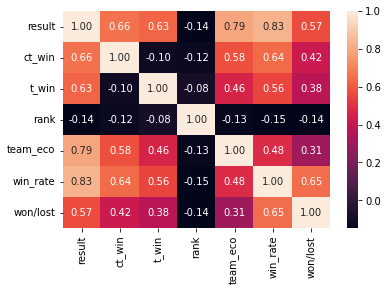

In [98]:
# plot a heat map of correlation
import seaborn as sns
df_sub = df[['result','ct_win','t_win', 'rank', 'team_eco','win_rate','won/lost']]
sns.heatmap(df_sub.corr(), annot=True, fmt=".2f")
plt.show()

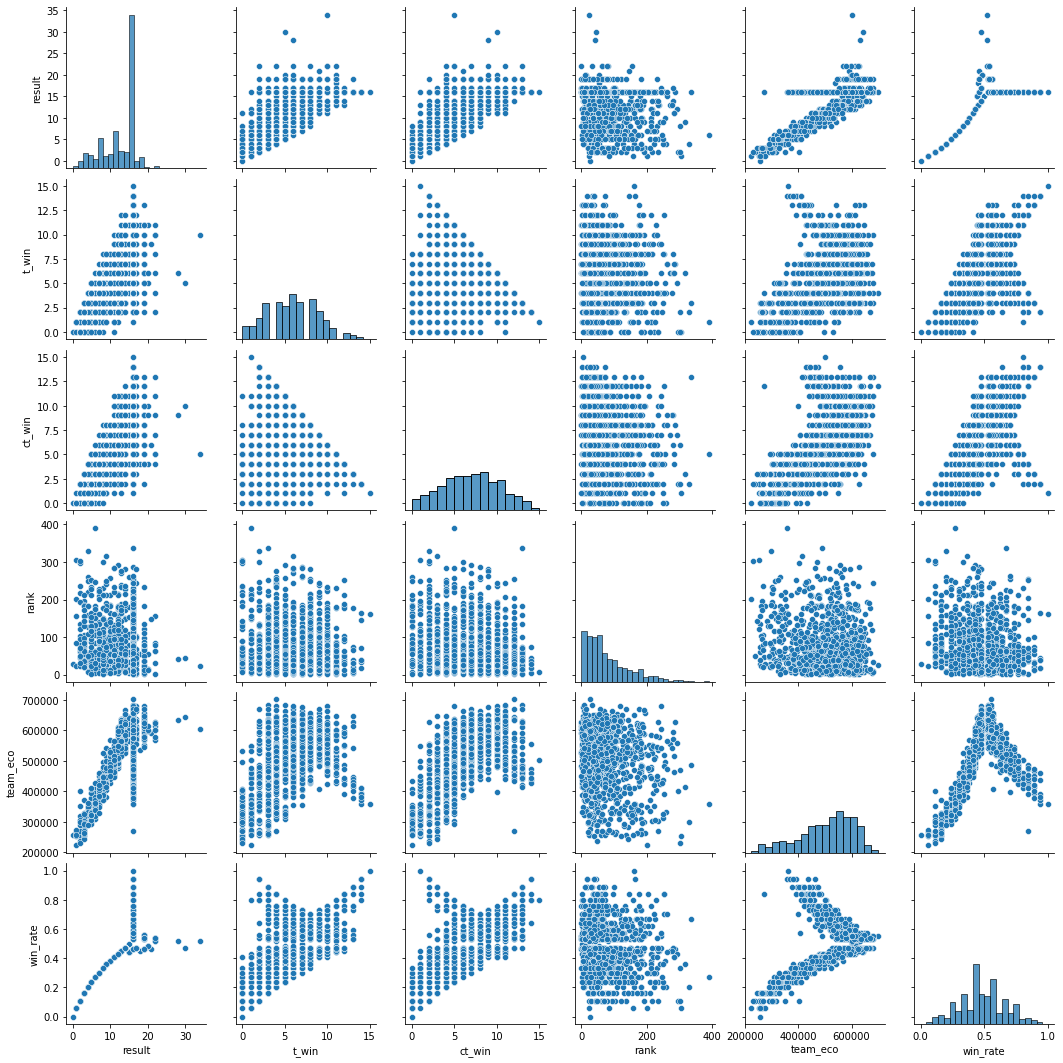

In [99]:
# show cross plot
sns.pairplot(df.sample(1000), x_vars=['result', 't_win', 'ct_win', 'rank', 'team_eco','win_rate'],
y_vars=['result', 't_win', 'ct_win', 'rank', 'team_eco','win_rate'], )
# df_sample=map_win_rate.sample(100)
# sns.lmplot(x="average_team_eco", y="total_win_rate", data=df_sample)

In [100]:
# Use PCA to reduce the dimintion
from sklearn.preprocessing import StandardScaler
features = ['result', 't_win', 'ct_win', 'rank', 'team_eco','win_rate']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['won/lost']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

# apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['won/lost']]], axis = 1)
finalDf

,principal component 1,principal component 2,won/lost
0,-1.724609,-2.555199,1
1,-1.420329,0.022618,1
2,-1.887755,-2.542620,1
3,2.848699,0.385657,0
4,2.851548,-0.488612,0
...,...,...,...
31705,-1.339754,-0.375054,1
31706,0.332325,-1.620384,0
31707,0.180115,0.839892,0
31708,3.617945,-0.985549,0


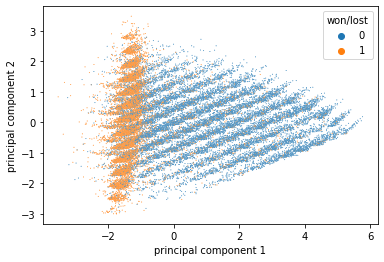

In [101]:
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
# targets = [1,0]
# colors = ['b', 'g']
# for targets, color in zip(targets,colors):
#     indicesToKeep = finalDf['won/lost'] == targets
#     ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#                , finalDf.loc[indicesToKeep, 'principal component 2']
#                , c = color
#                , s = 5)
# ax.legend(targets)
# ax.grid()

#plot the scater after pca
sns.scatterplot(data=finalDf, x = "principal component 1", y = "principal component 2", hue = "won/lost",s = 1)

# Model Evaluation and Selection

## K-NN

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# split train model and test model by .75 and .25
x, y = finalDf[['principal component 1','principal component 2']], finalDf['won/lost']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .75, stratify = y)

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=2)

In [104]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [105]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# train_preds = knn_model.predict(x_train)
# mse = mean_squared_error(y_train, train_preds)
# train_rmse = sqrt(mse)
# train_rmse

In [106]:
# test_preds = knn_model.predict(x_test)
# mse = mean_squared_error(y_test, test_preds)
# test_rmse = sqrt(mse)
# test_rmse

In [107]:
# check the accuracy_score
from sklearn.metrics import accuracy_score
y_preds = knn_model.predict(x_test)
print(accuracy_score(y_test, y_preds))

0.7523965691220988


In [108]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79      4268
           1       0.81      0.61      0.69      3660

    accuracy                           0.75      7928
   macro avg       0.77      0.74      0.74      7928
weighted avg       0.76      0.75      0.75      7928



## Naive Bayes Classifier

In [109]:
#create new sub data frame
nbc = df.iloc[:, [3,4,5,6,7,8,9,10,11]]
nbc

,team,_map,start_as,result,ct_win,t_win,rank,team_eco,win_rate
0,Natus Vincere,Nuke,ct,16,14,2,6,479750.0,0.80
1,Natus Vincere,Dust2,t,16,8,8,6,578200.0,0.55
2,Natus Vincere,Mirage,ct,16,14,2,6,461650.0,0.89
3,Astralis,Dust2,ct,5,1,4,1,376300.0,0.24
4,Astralis,Nuke,t,5,3,2,1,370550.0,0.24
...,...,...,...,...,...,...,...,...,...
31705,HellRaisers,Cache,ct,16,9,7,15,519450.0,0.62
31706,CLG,Train,ct,11,9,2,24,524650.0,0.41
31707,TYLOO,Mirage,t,12,4,8,33,513800.0,0.43
31708,MVP Project,Mirage,ct,4,4,0,98,310700.0,0.20


In [110]:
# encode catagory values
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
nbc['team'] = oe.fit_transform(nbc[['team']])
nbc['_map'] = oe.fit_transform(nbc[['_map']])
nbc['start_as'] = oe.fit_transform(nbc[['start_as']])

<ipython-input-110-a30eb61c7119>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nbc['team'] = oe.fit_transform(nbc[['team']])
<ipython-input-110-a30eb61c7119>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nbc['_map'] = oe.fit_transform(nbc[['_map']])
<ipython-input-110-a30eb61c7119>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [111]:
# nbc

In [112]:
# define x and y values
x = nbc.iloc[:, [0,1,2,3,4,5,6,7,8]].values
y = df.iloc[:, 12].values
# seprate training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .75, stratify = y)

In [113]:
# do feature scaling to the training and test set of independent variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [114]:
# train the model
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [115]:
# check accuracy
y_preds = classifier.predict(x_test)
print(accuracy_score(y_test, y_preds))

0.7892280524722503


In [116]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      4268
           1       0.71      0.92      0.80      3660

    accuracy                           0.79      7928
   macro avg       0.81      0.80      0.79      7928
weighted avg       0.82      0.79      0.79      7928



## Regression Trees

In [117]:
from sklearn.tree import DecisionTreeClassifier 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_preds = clf.predict(x_test)

In [118]:
print(accuracy_score(y_test, y_preds))

0.7800201816347124


In [119]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      4268
           1       0.76      0.76      0.76      3660

    accuracy                           0.78      7928
   macro avg       0.78      0.78      0.78      7928
weighted avg       0.78      0.78      0.78      7928



##Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [121]:
#Split dataset into training (75%) and testing (25%) sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0) 
#Instantiate model
log_reg = LogisticRegression()
#Fit  model using training data
log_reg.fit(x_train,y_train)

LogisticRegression()

In [122]:
train_acc = log_reg.score(x_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 83.06702548145657


In [123]:
y_pred = log_reg.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 84.06912209889002


In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4261
           1       0.82      0.84      0.83      3667

    accuracy                           0.84      7928
   macro avg       0.84      0.84      0.84      7928
weighted avg       0.84      0.84      0.84      7928




# Performance Evaluation



##ROC Curve

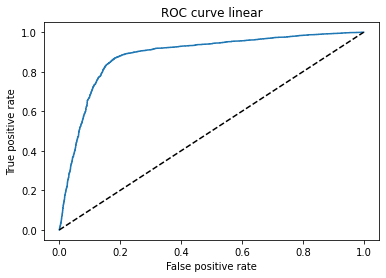

In [125]:
#Define metrics
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
#Create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title("ROC curve linear")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

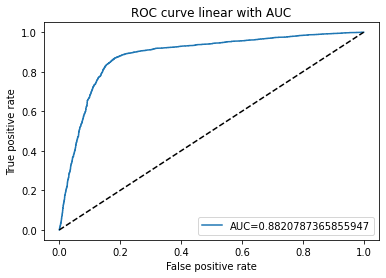

In [126]:
#Define metrics
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
AUC = metrics.roc_auc_score(y_test, y_pred_proba)
#Create ROC curve and AUC
plt.plot(fpr,tpr,label="AUC="+str(AUC))
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend(loc=4)
plt.title("ROC curve linear with AUC")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

##F1 Score

In [127]:
#from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [128]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4261
           1       0.82      0.84      0.83      3667

    accuracy                           0.84      7928
   macro avg       0.84      0.84      0.84      7928
weighted avg       0.84      0.84      0.84      7928



In [129]:
print(f1_score(y_test, y_pred))

0.8298989898989898
